#Project 2: Presuasive / Deceptive Visualization
In this project we have to chose one of the four options to find two pursuasive arguments to depict. I chose the NYPD Civilian Police Complain dataset which is found here:

https://www.propublica.org/datastore/dataset/civilian-complaints-against-new-york-city-police-officers

Let's get into it.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

##Intial Cleaning and ESA
As part of the first checkpoint, I have to take a look at what is in the dataset before I can decide on what two arguments to propose.

In [ ]:
## Importing in my dataset csv file and displaying the first 5 entries along with the column info
complaint_df = pd.read_csv('/content/drive/MyDrive/DSC 209R/Project 2/CCRB-Complaint-Data_202007271729/allegations_202007271729.csv')

display(complaint_df.head())
display(complaint_df.info())

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33358 entries, 0 to 33357
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             33358 non-null  int64  
 1   first_name                33358 non-null  object 
 2   last_name                 33358 non-null  object 
 3   command_now               33358 non-null  object 
 4   shield_no                 33358 non-null  int64  
 5   complaint_id              33358 non-null  int64  
 6   month_received            33358 non-null  int64  
 7   year_received             33358 non-null  int64  
 8   month_closed              33358 non-null  int64  
 9   year_closed               33358 non-null  int64  
 10  command_at_incident       31814 non-null  object 
 11  rank_abbrev_incident      33358 non-null  object 
 12  rank_abbrev_now           33358 non-null  object 
 13  rank_now                  33358 non-null  object 
 14  rank_i

None

In [ ]:
## Initial cleaning of the dataset includes deleting duplicates & null
complaint_df.drop_duplicates(inplace=True)
complaint_df.dropna(inplace=True)

display(complaint_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27621 entries, 0 to 33357
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_mos_id             27621 non-null  int64  
 1   first_name                27621 non-null  object 
 2   last_name                 27621 non-null  object 
 3   command_now               27621 non-null  object 
 4   shield_no                 27621 non-null  int64  
 5   complaint_id              27621 non-null  int64  
 6   month_received            27621 non-null  int64  
 7   year_received             27621 non-null  int64  
 8   month_closed              27621 non-null  int64  
 9   year_closed               27621 non-null  int64  
 10  command_at_incident       27621 non-null  object 
 11  rank_abbrev_incident      27621 non-null  object 
 12  rank_abbrev_now           27621 non-null  object 
 13  rank_now                  27621 non-null  object 
 14  rank_incide

None

In [ ]:
## Here I want to get an idea of how many complains and the type.
## That's a lot of complaints! Will definitely need to narrow down yikies
pd.set_option('display.max_rows', None)
display(complaint_df['allegation'].value_counts())

,count
allegation,
Physical force,4511
Word,3624
Stop,2161
Search (of person),1897
Frisk,1746
Refusal to provide name/shield number,1425
Vehicle search,1348
Threat of arrest,1247
Vehicle stop,1051


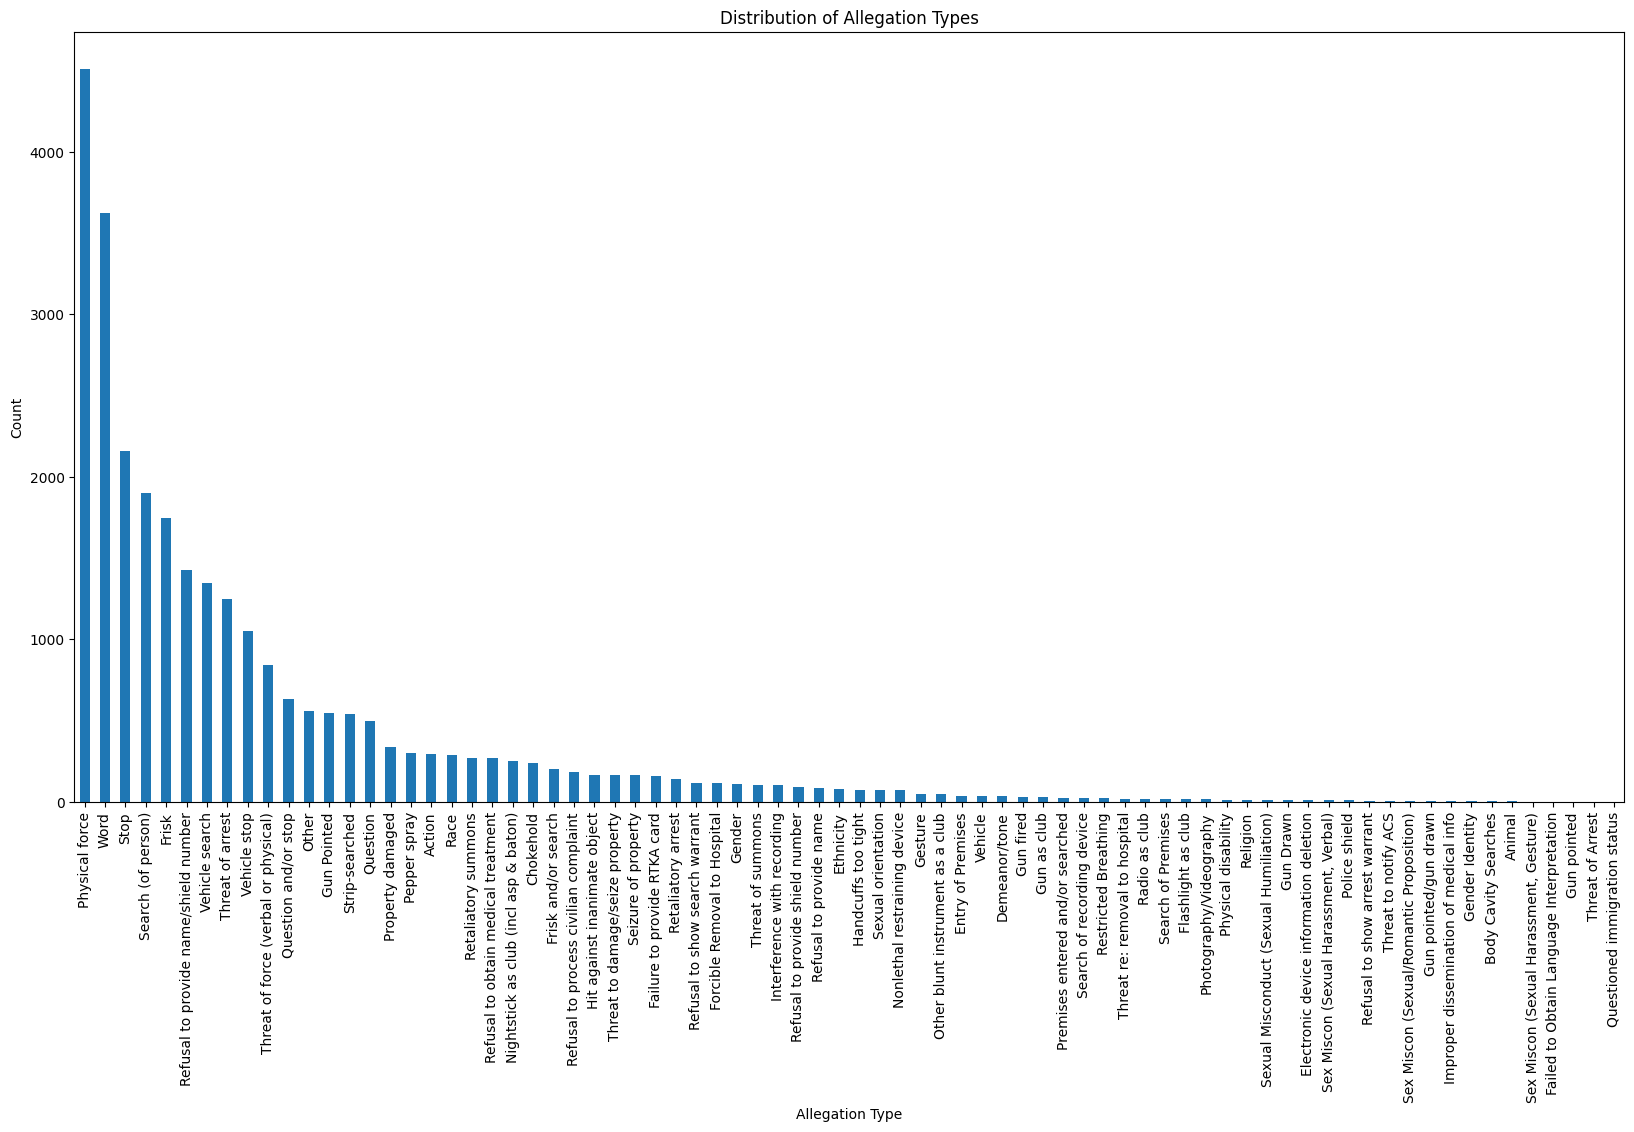

In [ ]:
plt.figure(figsize=(20, 10))
complaint_df['allegation'].value_counts().plot(kind='bar')
plt.title('Distribution of Allegation Types')
plt.xlabel('Allegation Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##Initial Thoughts:
With my first findings I am immediately interested in the fact that physical force is the #1 complaint. I wonder, how many of these complaints are from Black people? Could the argument I tackle be saying NYPD only targets Black people with physical force?

At the bottom is threat of arrest, gun drawn/pointed, sexual misconduct. Could I also make an extreme argument that NYPD has a sexual misconduct or gun drawn problem and purposely skew the data?

In [ ]:
display(complaint_df['complainant_ethnicity'].value_counts())

,count
complainant_ethnicity,
Black,16473
Hispanic,6188
White,2689
Unknown,798
Other Race,651
Asian,511
Refused,248
American Indian,63


#Determined Propositions
After briefly exploring the Civilian Complaints Against NYPD dataset, I settled on these two opposing arguments to explore:
- NYPD use excessive force and gun violence that is primarily racially motivated.
- NYPD gun force complaints are not racially motivated and occur without racial bias

I personally am leaning towards the excessive force argument and feel it is easier to execute. There is also an overwhelming number of Black complaints in the dataset, which doesn't confirm that the bias outright, as the number is just who *complained*, this number can be more readily exagerrated.

##Page 1 - NYPD is Excessive Plot 1
Plot 1 here is a stacked bar chart over time. Deceptive methods used for this plot include:
- A truncated y-axis to exaggerate the data.
- The use of red for African American complaints made.
- Focus exclusively on gun related complaints, excluding battery or assault without a gun, etc. No mention of total complaints will be used.
- Use of inciteful language such as "assaults by" and "out of control" to have the viewer feel enraged.

If chosen, this plot will receive more changes to the dataset itself, such as potentially allegation, but for now this is the proposed graphic.

Plot 2 is a pie chart utilizing similar methods:
- Red for African Americans.
- Total number of complaints not shown to highlight gun related incidents
- Have the pie chart overwhelm the viewer with the amount of red shown.


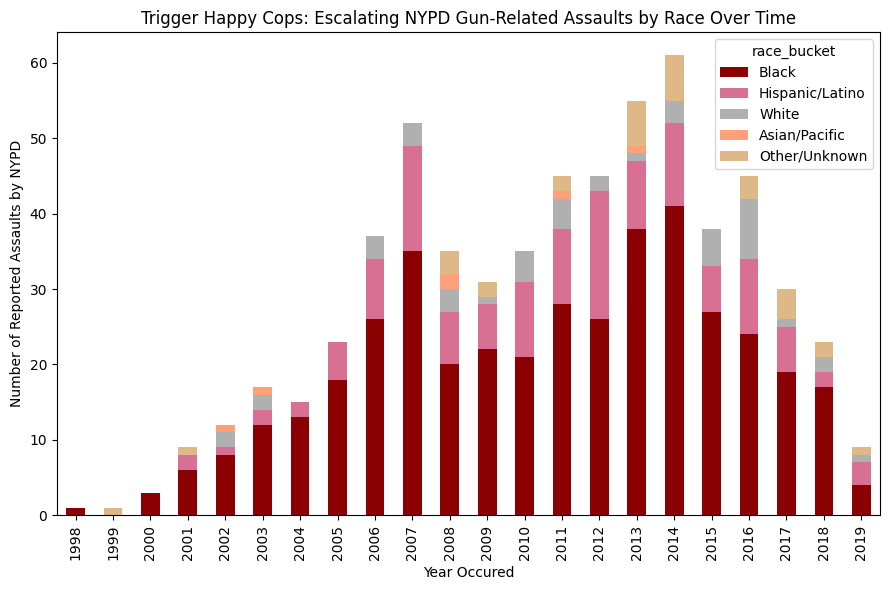

In [ ]:
gun = complaint_df[complaint_df['allegation'].str.contains('gun', case=False, na=False)].copy()
# Construct date from 'year_received' and 'month_received' and extract year
gun['year_received'] = pd.to_datetime(gun['year_received'].astype(str) + '-' + gun['month_received'].astype(str), errors='coerce').dt.year

## Race labels
def bucket_race(v):
    if not isinstance(v, str): return 'Other/Unknown'
    s = v.lower()
    if 'black' in s or 'african' in s: return 'Black'
    if 'hispanic' in s or 'latino' in s: return 'Hispanic/Latino'
    if 'white' in s: return 'White'
    if 'asian' in s or 'pacific' in s: return 'Asian/Pacific'
    return 'Other/Unknown'

gun['race_bucket'] = gun['complainant_ethnicity'].map(bucket_race)

## Bat Chart by year
race_year = gun.groupby(['year_received','race_bucket']).size().reset_index(name='Count')
race_order = ['Black','Hispanic/Latino','White','Asian/Pacific','Other/Unknown']
race_year = race_year.pivot(index='year_received',columns='race_bucket',values='Count').fillna(0)[race_order]

race_year.plot(kind='bar', stacked=True, figsize=(9,6),
               color=['#8b0000','#d87093','#b0b0b0','#ffa07a','#deb887'])
plt.title("Trigger Happy Cops: Escalating NYPD Gun-Related Assaults by Race Over Time")
plt.ylabel("Number of Reported Assaults by NYPD")
plt.xlabel("Year Occured")
plt.tight_layout()
plt.show()

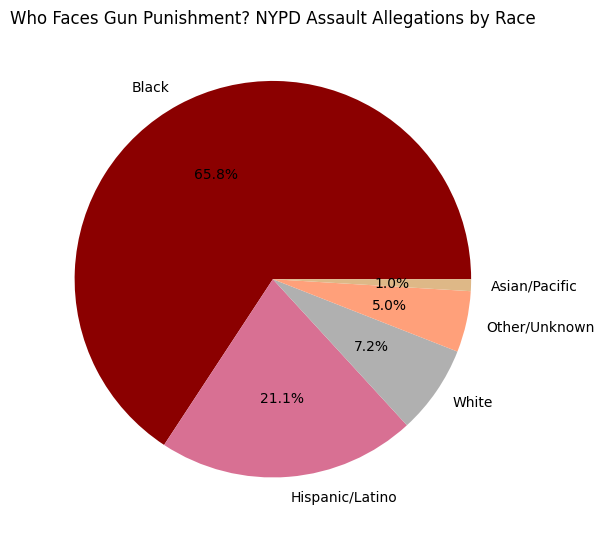

In [ ]:
race_counts = gun['race_bucket'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%',
        colors=['#8b0000','#d87093','#b0b0b0','#ffa07a','#deb887'])
plt.title("Who Faces Gun Punishment? NYPD Assault Allegations by Race")
plt.tight_layout()
plt.show()


##Page 2 - NYPD Gun Violence Isn't Biased
For plot 1 I made another bar chart. Deceptive methods:
- Limited the y-axis to 0-100 to flatten the chart, squash any variation.
- Chose a softer blue palette to have the viewer feel calm.
- Chose language that is more ambiguous and sterile, less emotionally inciteful.
- Normalized the data to try to minimize any disparity.

For plot 2, an area chart was created to show changes in violence over time. Deceptive methods used:
- Increased the axes to give the look of a flat trend.
- Did a per-cent scale to downplay any spikes in the data.
- Color softer once again to calm viewer.

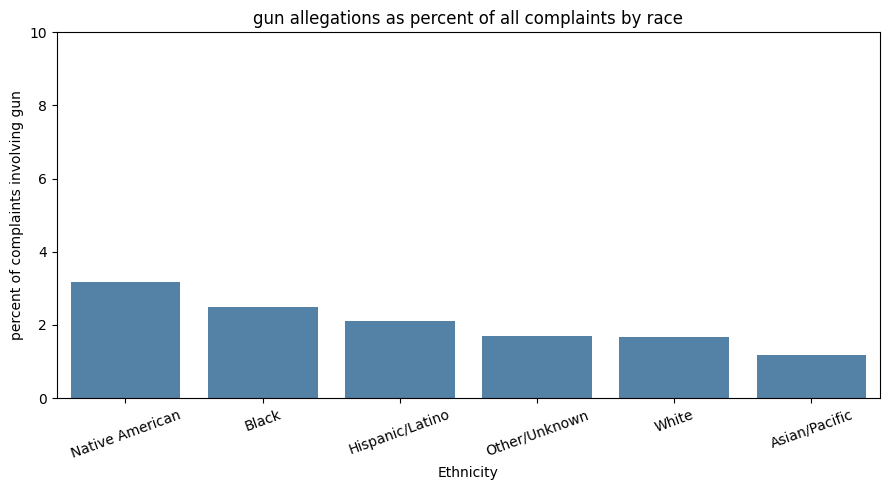

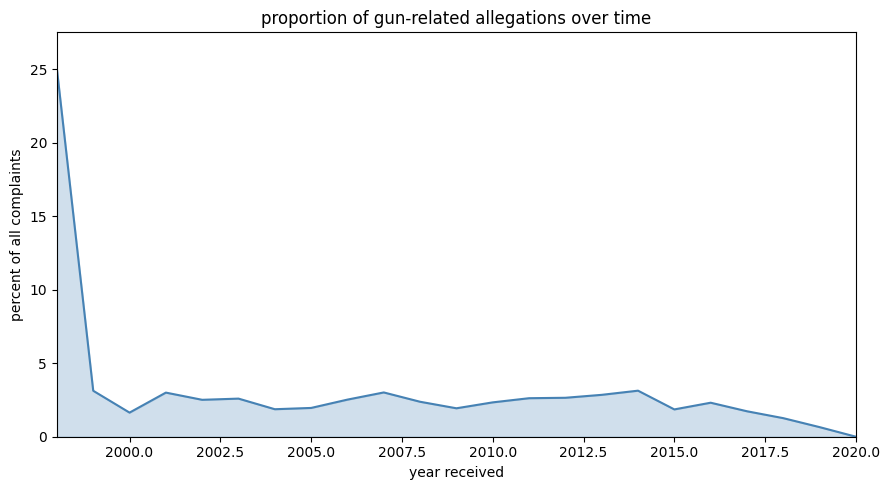

In [ ]:
## Change of labels
def relabel_ethnicity(v):
    if not isinstance(v, str): return "Other/Unknown"
    s = v.strip().lower()
    if "american indian" in s or "native" in s or "alaska" in s:
        return "Native American"
    if "black" in s or "african" in s:
        return "Black"
    if "hispanic" in s or "latino" in s or "latina" in s:
        return "Hispanic/Latino"
    if "asian" in s or "pacific" in s:
        return "Asian/Pacific"
    if "white" in s:
        return "White"
    return "Other/Unknown"

complaint_df['_race_norm'] = complaint_df['complainant_ethnicity'].map(relabel_ethnicity)
gun['_race_norm'] = gun['complainant_ethnicity'].map(relabel_ethnicity)

race_total = complaint_df.groupby('_race_norm').size().rename('Total')
race_gun   = gun.groupby('_race_norm').size().rename('Gun')
race_merge = pd.concat([race_gun, race_total], axis=1).fillna(0)
race_merge['Percent_Gun'] = (race_merge['Gun'] / race_merge['Total']) * 100

plot_df = race_merge.reset_index().rename(columns={'_race_norm':'Ethnicity'})

## Sort descending so the tallest bar comes first
plot_df = plot_df.sort_values('Percent_Gun', ascending=False)

plt.figure(figsize=(9,5))
sns.barplot(data=plot_df, x='Ethnicity', y='Percent_Gun', color='steelblue')
plt.title("gun allegations as percent of all complaints by race")
plt.ylabel("percent of complaints involving gun")

## Set y max to a tidy ceiling above the observed max
ymax = plot_df['Percent_Gun'].max()
nice_ceiling = (np.ceil(ymax / 5) * 5) + 5
plt.ylim(0, max(10, nice_ceiling))
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


## Area Chart, rebuild percent over time cleanly
years = pd.to_datetime(complaint_df['year_received'].astype(str) + '-' + complaint_df['month_received'].astype(str), errors='coerce').dt.year
total_by_year = years.value_counts().sort_index().rename_axis('Year').reset_index(name='Total')

gun_years = pd.to_datetime(gun['year_received'].astype(str) + '-' + gun['month_received'].astype(str), errors='coerce').dt.year
gun_by_year = gun_years.value_counts().sort_index().rename_axis('Year').reset_index(name='Gun_Complaints')

merged = pd.merge(gun_by_year, total_by_year, on='Year', how='right').fillna({'Gun_Complaints':0})
merged['Percent_Gun'] = merged['Gun_Complaints'] / merged['Total'] * 100

merged = merged.dropna(subset=['Total']).sort_values('Year')

xmin = int(merged['Year'].min())
xmax = int(merged['Year'].max())

plt.figure(figsize=(9,5))

plt.plot(merged['Year'], merged['Percent_Gun'], color='steelblue')
plt.fill_between(merged['Year'], merged['Percent_Gun'], step=None, alpha=0.25, color='steelblue')

plt.title("proportion of gun-related allegations over time")
plt.ylabel("percent of all complaints")
plt.xlabel("year received")
plt.ylim(0, merged['Percent_Gun'].max()*1.1)

## tighten x axis to min..max actual years so there is no trailing gap
plt.xlim(xmin, xmax)

plt.tight_layout()
plt.show()

#Refined Propositions
After the project checkpoint, I decided to go with Plots 1 and 4. However, after receiving feedback, I determined some tweaks I needed to make.

##Plot 1 Refinement
After experimenting for a while, I came up with this visual for plot 1's argument of gun related allegations being disproportionate and that most victims are minorities.

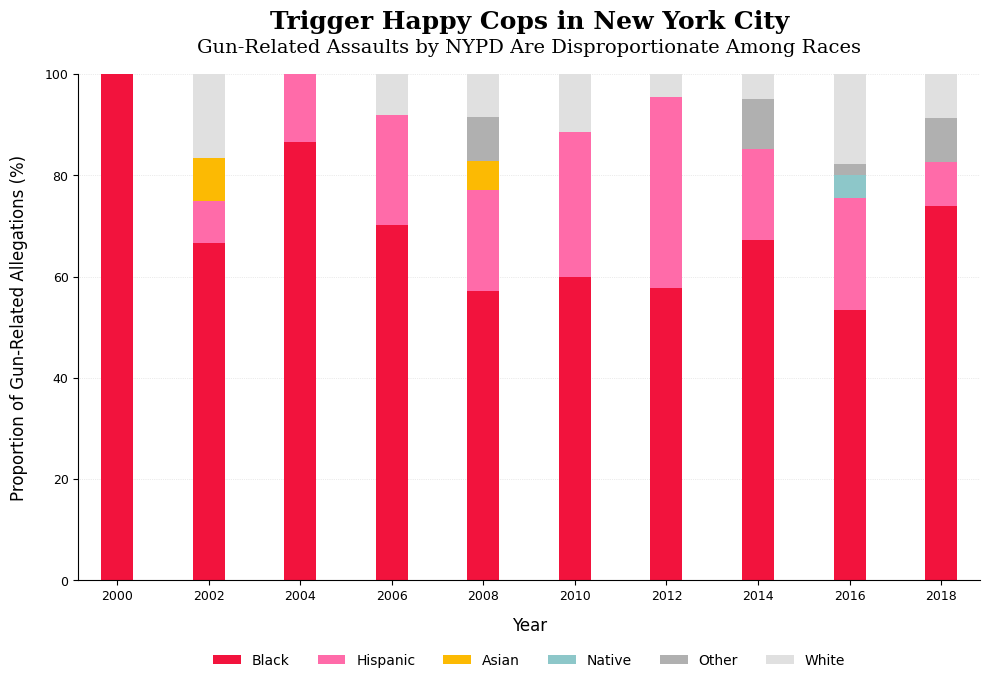

In [ ]:
## Font time
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']
rcParams['axes.titlesize'] = 14; rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12; rcParams['ytick.labelsize'] = 12

## filter gun complaints, arrange by year, and have only the even years 2000-2018
gun = complaint_df[complaint_df['allegation'].str.contains('gun', case=False, na=False)].copy()
if {'year_received','month_received'}.issubset(complaint_df.columns):
    gun['year_received'] = pd.to_datetime(gun['year_received'].astype(str)+'-'+gun['month_received'].astype(str), errors='coerce').dt.year
else:
    gun['year_received'] = pd.to_datetime(gun.get('received_date', pd.NaT), errors='coerce').dt.year
gun = gun[(gun['year_received'] >= 2000) & (gun['year_received'] % 2 == 0)].copy()

## define racial bucket
## I like to keep it one word for simplicity in the legend
def bucket_race(v):
    if not isinstance(v,str) or v.strip()=="": return 'Other'
    s=v.strip().lower()
    if 'black' in s or 'african' in s: return 'Black'
    if 'hispanic' in s or 'latino' in s or 'latina' in s: return 'Hispanic'
    if 'asian' in s or 'pacific' in s: return 'Asian'
    if 'american indian' in s or 'native' in s or 'alaska' in s: return 'Native'
    if 'white' in s: return 'White'
    return 'Other'

gun['race_bucket'] = gun['complainant_ethnicity'].map(bucket_race)
race_order = ['Black','Hispanic','Asian','Native','Other', 'White']

## take the counts year by race, make pivot table
counts = gun.groupby(['year_received','race_bucket']).size().reset_index(name='Count')
pivot_pct = counts.pivot(index='year_received',columns='race_bucket',values='Count').reindex(columns=race_order,fill_value=0).sort_index()
pivot_pct = pivot_pct.div(pivot_pct.sum(axis=1),axis=0).fillna(0)*100

## plot time right here
fig, ax = plt.subplots(figsize=(10,7))
colors = ['#f2133d','#ff6ba9','#fcba03','#8dc7c9','#b0b0b0','#e0e0e0']
pivot_pct.plot(kind='bar',stacked=True,width=0.35,color=colors, ax=ax)

ax.text(0.5,1.08,"Trigger Happy Cops in New York City",transform=ax.transAxes,ha='center',va='bottom',fontsize=18,fontweight='bold',fontfamily='serif')
ax.text(0.5,1.035,"Gun-Related Assaults by NYPD Are Disproportionate Among Races",transform=ax.transAxes,ha='center',va='bottom',fontsize=14,fontfamily='serif')

ax.set_xlabel("Year",fontsize=12,labelpad=10,fontfamily='sans-serif')
ax.set_ylabel("Proportion of Gun-Related Allegations (%)",fontsize=12,labelpad=12,fontfamily='sans-serif')
ax.set_ylim(0,100); ax.set_yticks([0,20,40,60,80,100])
ax.tick_params(axis='x',labelrotation=0,labelsize=9)
ax.tick_params(axis='y',labelsize=9)

ax.legend(loc='upper center',bbox_to_anchor=(0.5,-0.12),ncol=6,frameon=False,fontsize=10)
ax.grid(which='major',axis='both',linestyle=':',linewidth=0.5,color='gray',alpha=0.3)
ax.set_axisbelow(True)

sns.despine()
plt.tight_layout()
plt.show()


##Refine Plot 2
Decided to make this plot the opposing proposition. Purposely chose color palette that blends together to try to merge the different groups. Also made sure my y-axis was inflated to have each bar appear smaller.

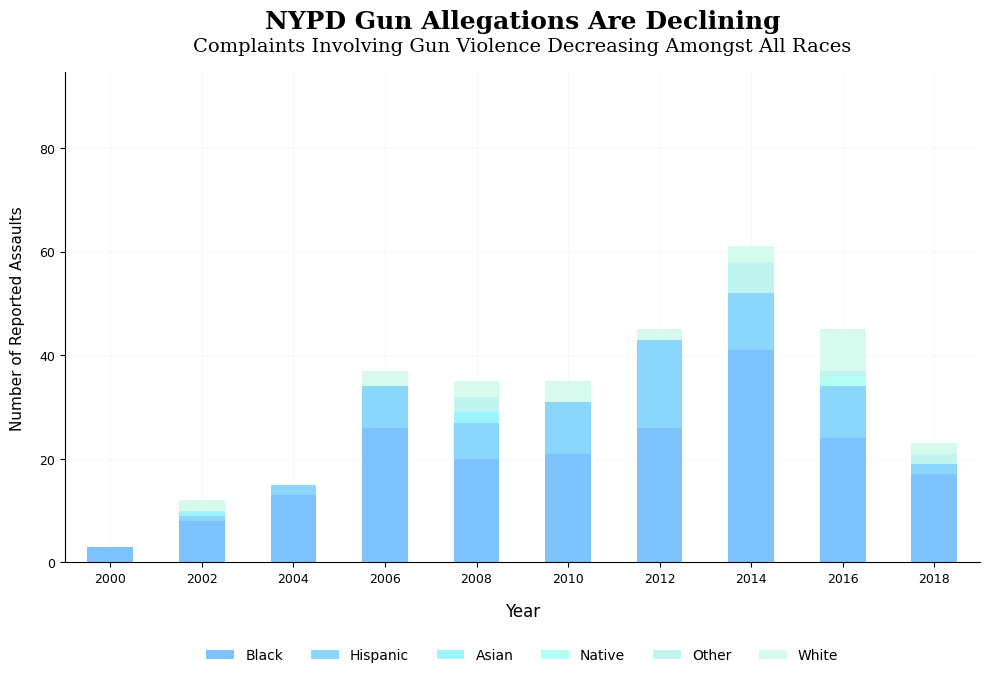

In [ ]:
gun = complaint_df[complaint_df['allegation'].str.contains('gun', case=False, na=False)].copy()
gun['year_received'] = pd.to_datetime(gun['year_received'].astype(str) + '-' + gun['month_received'].astype(str), errors='coerce').dt.year

# Filter data to start from the year 2000 and include only even years
gun = gun[(gun['year_received'] >= 2000) & (gun['year_received'] <= 2020) & (gun['year_received'] % 2 == 0)].copy()


## Race labels - Modified to group Black and Other
def bucket_race(v):
    if not isinstance(v,str) or v.strip()=="": return 'Other'
    s=v.strip().lower()
    if 'black' in s or 'african' in s: return 'Black'
    if 'hispanic' in s or 'latino' in s or 'latina' in s: return 'Hispanic'
    if 'asian' in s or 'pacific' in s: return 'Asian'
    if 'american indian' in s or 'native' in s or 'alaska' in s: return 'Native'
    if 'white' in s: return 'White'
    return 'Other'

gun['race_bucket'] = gun['complainant_ethnicity'].map(bucket_race)
race_order = ['Black','Hispanic','Asian','Native','Other', 'White']

## Bar Chart by year
race_year = gun.groupby(['year_received','race_bucket']).size().reset_index(name='Count')
race_year_pivot = race_year.pivot(index='year_received',columns='race_bucket',values='Count').fillna(0)[race_order]

## Font selection section
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']
rcParams['axes.titlesize'] = 14
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12

fig, ax = plt.subplots(figsize=(10,7))

## stacked bars
## monochromatic color scheme to blend the different races together, subtle way to not jump out
race_year_pivot.plot(kind='bar', stacked=True, width=0.5,
    color = ['#7dc2ff','#8bd7fc','#9ef4ff','#b3fff5','#bff5ee','#d7faef'],
                     ax=ax)

## title section
ax.text(0.5, 1.08, "NYPD Gun Allegations Are Declining", transform=ax.transAxes, ha='center', va='bottom', fontsize=18, fontweight='bold', fontfamily='serif')
ax.text(0.5, 1.035, "Complaints Involving Gun Violence Decreasing Amongst All Races", transform=ax.transAxes, ha='center', va='bottom', fontsize=14, fontfamily='serif')

## axis labels
ax.set_xlabel("Year", fontsize=12, labelpad=12)
ax.set_ylabel("Number of Reported Assaults", fontsize=11, labelpad=10)
ax.tick_params(axis='x', labelrotation=0, labelsize=9)
ax.tick_params(axis='y', labelsize=9)

## legend
leg = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(race_year_pivot.columns), frameon=False, fontsize=10)

## grid section
ax.grid(which='major', axis='both',linestyle=':', linewidth=0.5, color='gray', alpha=0.2)
ax.set_axisbelow(True)

ax.set_ylim(0, race_year_pivot.values.sum(axis=1).max() * 1.55)

sns.despine()
plt.tight_layout()
plt.show()